# Piyavskii

<img src="./data/piyavskii.png" alt="Simple 1D Function!" width="400"/>

In [1]:
import numpy as np # for sampling points
import sys # necessary for local path. If you install the library, it can be removed
sys.path.append('..') 
import lipschitz_opt
import matplotlib.pyplot as plt # visualization
from ipywidgets import interact, widgets # for playing with the hyperparameters on the functions

In [2]:
from lipschitz_opt.application import Func1D_0, Func1D_composite

In [3]:
from lipschitz_opt import piyavskii

Text(0.5, 1.0, 'f(x)= 1.0-1.0*|x-0.3|^1.0 for 0.0<=x<=1.0')

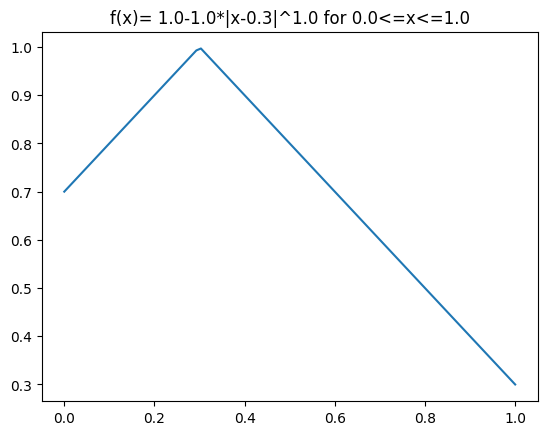

In [4]:
f = Func1D_0(a=0.3)
x = np.linspace(f.x_min, f.x_max, 100) # samples for visualization
y =f(x) # output

plt.plot(x, y)
plt.title('f(x)= {}-{}*|x-{}|^{} for {}<=x<={}'.format(f.d, f.c, f.a, f.b, f.x_min, f.x_max))

In [5]:
result =piyavskii(f, f.lipschitz(), f.x_min, f.x_max, n_iter=3, use_gurobi=False)

AttributeError: 'numpy.ndarray' object has no attribute 'AddSelfToCoeffMapOrStack'

In [ ]:
result =piyavskii(f, f.lipschitz(), f.x_min, f.x_max, n_iter=3, maximize=False)

In [ ]:
def plot_piyavskii(f, nb_split, maximize=True):
    
    x = np.linspace(f.x_min, f.x_max, 100) # samples for visualization
    y =f(x) # output

    plt.plot(x, y)
    lip = f.lipschitz()
    result =piyavskii(f, f.lipschitz(), f.x_min, f.x_max, n_iter=nb_split)
    
    plt.title('f(x)<={}'.format(result[0]))
    g_ = np.min([np.array([y_i + lip*np.abs(x-x_i)]) \
                 for (y_i, x_i) in zip(result[1]['y'], result[1]['x'])], 0)
    g_ = g_[0]
    plt.plot(x, g_, '--', c='k')
    plt.plot(result[1]['x'], result[1]['y'], 'x', c='r')

Global optimum reached: 1.0


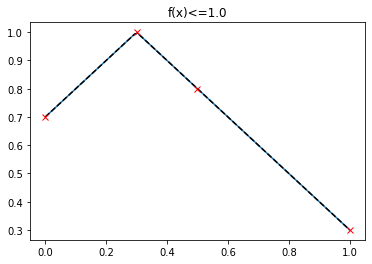

In [8]:
plot_piyavskii(f, 10)

In [9]:
f_0 = Func1D_0(a=0.25, c=1.)
f_1 = Func1D_0(a=0.75, b=2, c=0.6)
f_2 = Func1D_composite([f_0,f_1], op='max')

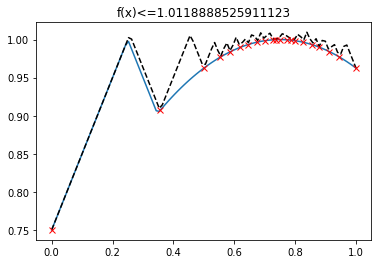

In [11]:
plot_piyavskii(f_2, 20)